#DINÂMICA - Curso Data Expert (Dnc Group)

Nesse notebook está a resolução de uma das dinâmicas da formação de cientista de dados da Dnc. Particularmente, a intenção era fazer uma análise da base de dados "new york flights" e responder três perguntas, sendo elas: 
1. Qual o comportamento médio e a variância dos dados dos voos que atrasam mais de duas horas?

2. Quais destinos geraram voos com o maior número de atrasos na partida?

3. Quais são as velocidades médias dos voos nos 5 destinos que mais ocorrem atrasos?

##1 - Importanto a base de dados:

In [ ]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/GabrielGarufi/Dinamica-Ny-Flights/main/Data/nyflights.csv', sep=',')

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


## Etapa 1: Qual o comportamento médio e a variância dos dados dos voos que atrasam mais de duas horas?

### *A - Filtrando a tabela com os voos registrados que atrasam mais de duas horas.*

In [ ]:
df120 = df[df['dep_delay']>120]

### *B - Filtrando a coluna 'dep_delay'  e aplicando as funções describe() e .T*

In [ ]:
df120['dep_delay'].describe()

count   9,723.00
mean      186.98
std        74.60
min       121.00
25%       139.00
50%       166.00
75%       210.00
max     1,301.00
Name: dep_delay, dtype: float64

In [ ]:
df120['dep_delay'].max()

1301.0

### *C - Adicionando uma coluna para a amplitude e para a variância*

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

df120new = pd.DataFrame(df120['dep_delay'].describe())

df120new = df120new.T
df120new['range'] = df120['dep_delay'].max() - df120['dep_delay'].min()
df120new['var'] = df120['dep_delay'].var()
df120new.head()

,count,mean,std,min,25%,50%,75%,max,range,var
dep_delay,"9,723.00",186.98,74.60,121.00,139.00,166.00,210.00,"1,301.00","1,180.00","5,564.69"


### *D -  Plotar um histograma e um boxplot com os dados da coluna 'dep_delay'*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


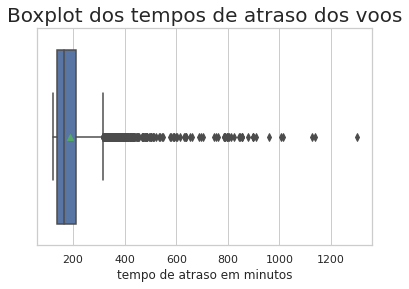

In [ ]:
ax = sns.boxplot(df120['dep_delay'], showmeans=True, orient='h')
sns.set_theme(style="whitegrid")
ax.set_title('Boxplot dos tempos de atraso dos voos', fontsize=20)
plt.xlabel('tempo de atraso em minutos')
plt.show()

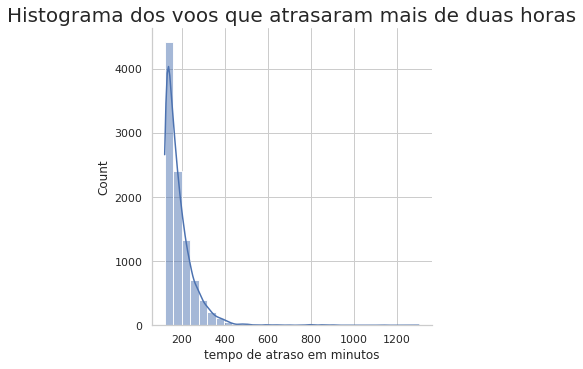

In [ ]:
sns.displot(df120['dep_delay'], kind='hist', bins=30, kde=True)
plt.xlabel("tempo de atraso em minutos")
plt.title("Histograma dos voos que atrasaram mais de duas horas", fontsize=20)
plt.show()

Podemos observar que: 

* A maioria dos voos que atrasam mais de duas horas tende a atrasar por volta de 3 horas.
* Nenhum voo atrasou mais de 24 horas. O voo com maior atraso foi de cerca de 21 horas. 
* O histograma indica que a distribuição de voos com mais de duas horas de atraso não obedece a uma distribuição normal.
* O desvio padrão de atraso desses voos é de mais de 70 minutos, o que indica uma grande variabilidade nos dados.
* Por inspeção visual do boxplot, a base apresenta quantidade significativa de outliers. 

##Etapa 2 - Quais destinos geraram voos com o maior número de atrasos na partida?

### A - Considerando atrasos relevantes os voos com mais de 5 minutos atrasados:

In [ ]:
df5 = df[df['dep_delay']>5]
df5.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
25,2013,1,1,608.00,600,8.00,807.00,735,32.00,MQ,3768,N9EAMQ,EWR,ORD,139.00,719,6,0,2013-01-01 06:00:00
26,2013,1,1,611.00,600,11.00,945.00,931,14.00,UA,303,N532UA,JFK,SFO,366.00,2586,6,0,2013-01-01 06:00:00
31,2013,1,1,623.00,610,13.00,920.00,915,5.00,AA,1837,N3EMAA,LGA,MIA,153.00,1096,6,10,2013-01-01 06:00:00
41,2013,1,1,632.00,608,24.00,740.00,728,12.00,EV,4144,N13553,EWR,IAD,52.00,212,6,8,2013-01-01 06:00:00
47,2013,1,1,644.00,636,8.00,931.00,940,-9.00,UA,1701,N75435,EWR,FLL,151.00,1065,6,36,2013-01-01 06:00:00


In [ ]:
df5atrasos = pd.DataFrame(df5['dest'].value_counts())

### *B - Filtrando os 5 destinos com mais atrasos*

In [ ]:
df5piores = df5atrasos.sort_values(by=['dest'], ascending = False).head(5)

In [ ]:
df5piores = df5piores.rename_axis('destinos').reset_index()
df5piores = df5piores.rename(columns={'dest':'quantidade'})


In [ ]:
df5piores.head()

,destinos,quantidade
0,ORD,4975
1,ATL,4687
2,LAX,4442
3,MCO,4083
4,SFO,4078


### *C - Filtrando os 5 destinos com menos atrasos*

In [ ]:
df5melhores = df5atrasos.sort_values(by=['dest'], ascending = True).head(5)
df5melhores = df5melhores.rename_axis('destinos').reset_index()
df5melhores.rename(columns={'dest':'quantidade'}, inplace=True)

In [ ]:
df5melhores.head()

,destinos,quantidade
0,ANC,3
1,PSP,3
2,SBN,6
3,EYW,6
4,MTJ,6


In [ ]:
df5piores['destinos']

0    ORD
1    ATL
2    LAX
3    MCO
4    SFO
Name: destinos, dtype: object

In [ ]:
df5piores.reindex

<bound method DataFrame.reindex of   destinos  quantidade
0      ORD        4975
1      ATL        4687
2      LAX        4442
3      MCO        4083
4      SFO        4078>

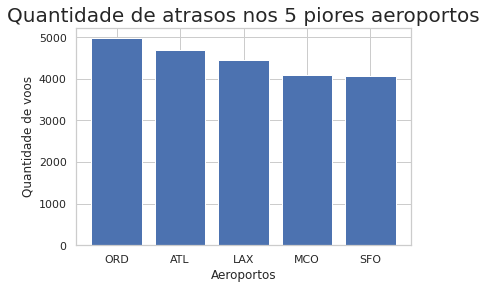

In [ ]:
plt.bar(df5piores['destinos'],df5piores['quantidade'])
plt.title('Quantidade de atrasos nos 5 piores aeroportos', fontsize=20)
plt.xlabel('Aeroportos')
plt.ylabel('Quantidade de voos')
plt.show()

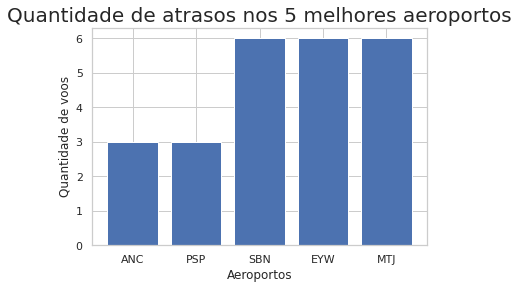

In [ ]:
plt.bar(df5melhores['destinos'],df5melhores['quantidade'])
plt.title('Quantidade de atrasos nos 5 melhores aeroportos', fontsize=20)
plt.xlabel('Aeroportos')
plt.ylabel('Quantidade de voos')
plt.show()

## Etapa 3 - Quais são as velocidades médias dos voos nos 5 destinos que mais ocorrem atrasos. 

### *A - Filtrar a tabela com os destinos com mais voos atrasados através de uma máscara*

In [ ]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.00,515,2.00,830.00,819,11.00,UA,1545,N14228,EWR,IAH,227.00,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.00,529,4.00,850.00,830,20.00,UA,1714,N24211,LGA,IAH,227.00,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.00,540,2.00,923.00,850,33.00,AA,1141,N619AA,JFK,MIA,160.00,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.00,545,-1.00,"1,004.00",1022,-18.00,B6,725,N804JB,JFK,BQN,183.00,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01 06:00:00


In [ ]:
df5piores.head()

,destinos,quantidade
0,ORD,4975
1,ATL,4687
2,LAX,4442
3,MCO,4083
4,SFO,4078


In [ ]:
mask = df[(df['dest']=='ORD') | (df['dest']=='ATL') | (df['dest']=='LAX') | (df['dest']=='MCO') | (df['dest']=='SFO')]

In [ ]:
dfvoos = df[mask]
dfvoos.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01 06:00:00
5,2013,1,1,554.00,558,-4.00,740.00,728,12.00,UA,1696,N39463,EWR,ORD,150.00,719,5,58,2013-01-01 05:00:00
8,2013,1,1,557.00,600,-3.00,838.00,846,-8.00,B6,79,N593JB,JFK,MCO,140.00,944,6,0,2013-01-01 06:00:00
9,2013,1,1,558.00,600,-2.00,753.00,745,8.00,AA,301,N3ALAA,LGA,ORD,138.00,733,6,0,2013-01-01 06:00:00
12,2013,1,1,558.00,600,-2.00,924.00,917,7.00,UA,194,N29129,JFK,LAX,345.00,2475,6,0,2013-01-01 06:00:00


### *B - Calculando a velocidade média desses destinos (em mph/h)*

In [ ]:
dfvoos['vel(mph)'] = dfvoos['distance']/(dfvoos['air_time']/60)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfvoos.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,vel(mph)
4,2013,1,1,554.00,600,-6.00,812.00,837,-25.00,DL,461,N668DN,LGA,ATL,116.00,762,6,0,2013-01-01 06:00:00,394.14
5,2013,1,1,554.00,558,-4.00,740.00,728,12.00,UA,1696,N39463,EWR,ORD,150.00,719,5,58,2013-01-01 05:00:00,287.60
8,2013,1,1,557.00,600,-3.00,838.00,846,-8.00,B6,79,N593JB,JFK,MCO,140.00,944,6,0,2013-01-01 06:00:00,404.57
9,2013,1,1,558.00,600,-2.00,753.00,745,8.00,AA,301,N3ALAA,LGA,ORD,138.00,733,6,0,2013-01-01 06:00:00,318.70
12,2013,1,1,558.00,600,-2.00,924.00,917,7.00,UA,194,N29129,JFK,LAX,345.00,2475,6,0,2013-01-01 06:00:00,430.43


###*C - Destacando a velocidade média dos voos dos 5 destinos com mais atrasos*

In [ ]:
df5_velmean = pd.DataFrame(dfvoos.groupby('dest').mean()['vel(mph)']).reset_index()

In [ ]:
df5_velmean

,dest,vel(mph)
0,ATL,405.18
1,LAX,452.80
2,MCO,422.39
3,ORD,381.13
4,SFO,448.54


 ### *D - Plotando o boxplot dos 4 destinos com mais atrasos*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


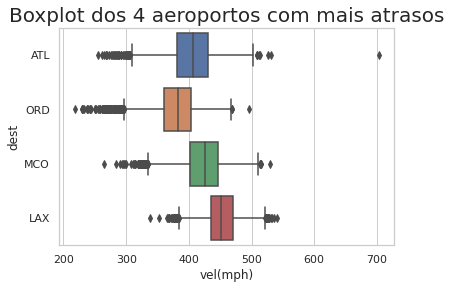

In [ ]:
sns.boxplot(dfvoos[dfvoos['dest']!='SFO']['vel(mph)'], dfvoos[dfvoos['dest']!='SFO']['dest'])
plt.title('Boxplot dos 4 aeroportos com mais atrasos', fontsize=20)
plt.show()